In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(r"c:\Users\Akhilesh Nambiar\Downloads\ALXN.csv",index_col='Date', parse_dates=True)
df

,ALXN
Date,
2013-02-08,93.66
2013-02-09,NaN
2013-02-10,NaN
2013-02-11,92.30
2013-02-12,90.21
...,...
2018-02-03,NaN
2018-02-04,NaN
2018-02-05,112.72


In [3]:
df = df.fillna(method="ffill")
df

C:\Users\Akhilesh Nambiar\AppData\Local\Temp\ipykernel_9392\3316285391.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


,ALXN
Date,
2013-02-08,93.66
2013-02-09,93.66
2013-02-10,93.66
2013-02-11,92.30
2013-02-12,90.21
...,...
2018-02-03,116.15
2018-02-04,116.15
2018-02-05,112.72


In [4]:
alpha = 0.2
manual_ewma = []
for x in df['ALXN'].to_numpy():
  if len(manual_ewma) > 0:
    xhat = alpha * x + (1 - alpha) * manual_ewma[-1]
  else:
    xhat = x
  manual_ewma.append(xhat)
df['Manual'] = manual_ewma

In [5]:
df

,ALXN,Manual
Date,,
2013-02-08,93.66,93.660000
2013-02-09,93.66,93.660000
2013-02-10,93.66,93.660000
2013-02-11,92.30,93.388000
2013-02-12,90.21,92.752400
...,...,...
2018-02-03,116.15,120.449549
2018-02-04,116.15,119.589639
2018-02-05,112.72,118.215711


In [6]:
df['EWMA'] = df['ALXN'].ewm(alpha=alpha, adjust=False).mean()
df

,ALXN,Manual,EWMA
Date,,,
2013-02-08,93.66,93.660000,93.660000
2013-02-09,93.66,93.660000,93.660000
2013-02-10,93.66,93.660000,93.660000
2013-02-11,92.30,93.388000,93.388000
2013-02-12,90.21,92.752400,92.752400
...,...,...,...
2018-02-03,116.15,120.449549,120.449549
2018-02-04,116.15,119.589639,119.589639
2018-02-05,112.72,118.215711,118.215711


SIMPLE EXPONENTIAL SMOOTHING


In [7]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [8]:
simple_exp = SimpleExpSmoothing(df['ALXN'])

D:\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [9]:
df.index

DatetimeIndex(['2013-02-08', '2013-02-09', '2013-02-10', '2013-02-11',
               '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15',
               '2013-02-16', '2013-02-17',
               ...
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', name='Date', length=1826, freq=None)

In [10]:
df.index.freq = 'D'

In [11]:
result_1 = simple_exp.fit(smoothing_level=alpha, optimized=False)
result_1.predict(start=df.index[0], end=df.index[-1])

2013-02-08     93.660000
2013-02-09     93.660000
2013-02-10     93.660000
2013-02-11     93.660000
2013-02-12     93.388000
                 ...    
2018-02-03    121.524437
2018-02-04    120.449549
2018-02-05    119.589639
2018-02-06    118.215711
2018-02-07    117.554569
Freq: D, Length: 1826, dtype: float64

<Axes: xlabel='Date'>

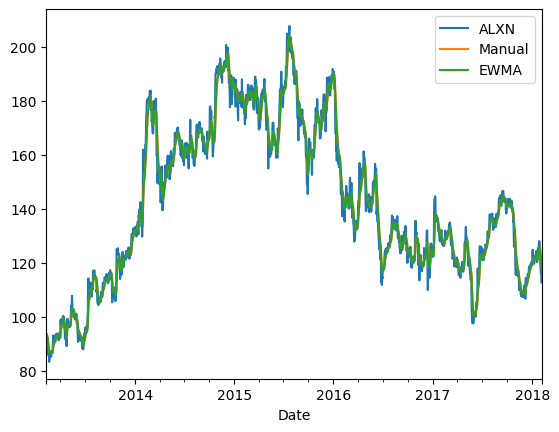

In [12]:
df.plot()

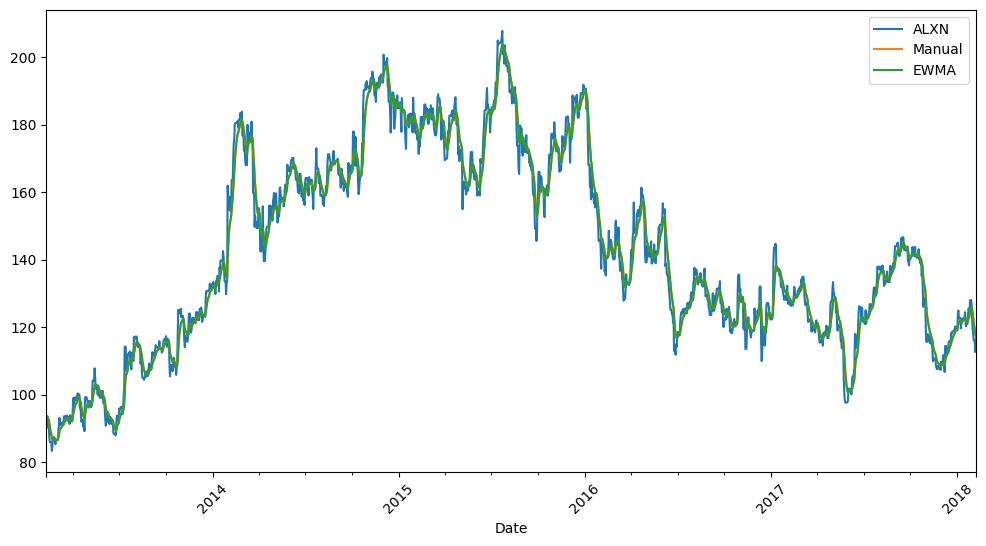

In [13]:
df.plot(figsize=(12, 6))
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

**Conclusion**: The smoothed lines help you observe the general trend of the stock price without getting distracted by the short-term volatility. If you were to use this for forecasting or analysis, EWMA would provide a solid baseline for understanding the stock’s overall movement and reduce the noise from day-to-day price fluctuations.


In [14]:
# If you don't want to go with predict function want all-in sample predictions ,
# use res.fittedvalues then res.forecast(n) to forecast n steps
# This forecast after last time used in your train data

result_1.fittedvalues


Date
2013-02-08     93.660000
2013-02-09     93.660000
2013-02-10     93.660000
2013-02-11     93.660000
2013-02-12     93.388000
                 ...    
2018-02-03    121.524437
2018-02-04    120.449549
2018-02-05    119.589639
2018-02-06    118.215711
2018-02-07    117.554569
Freq: D, Length: 1826, dtype: float64

SPLITTING THE DATA INTO TRAINING AND TESTING SET

In [15]:
train = df[:int(0.9*(len(df)))]
test = df[int(0.9*(len(df))):]

train_idx = df.index <= train.index[-1]
# Any row less than train.index[-1] will belong the train dataset
test_idx = df.index > train.index[-1]
N_test = test_idx.sum()


In [16]:
train

,ALXN,Manual,EWMA
Date,,,
2013-02-08,93.66,93.660000,93.660000
2013-02-09,93.66,93.660000,93.660000
2013-02-10,93.66,93.660000,93.660000
2013-02-11,92.30,93.388000,93.388000
2013-02-12,90.21,92.752400,92.752400
...,...,...,...
2017-08-04,136.64,136.206759,136.206759
2017-08-05,136.64,136.293408,136.293408
2017-08-06,136.64,136.362726,136.362726


In [17]:
test

,ALXN,Manual,EWMA
Date,,,
2017-08-09,136.85,136.660356,136.660356
2017-08-10,132.30,135.788285,135.788285
2017-08-11,132.93,135.216628,135.216628
2017-08-12,132.93,134.759302,134.759302
2017-08-13,132.93,134.393442,134.393442
...,...,...,...
2018-02-03,116.15,120.449549,120.449549
2018-02-04,116.15,119.589639,119.589639
2018-02-05,112.72,118.215711,118.215711


In [18]:
N_test

183

In [19]:
ses = SimpleExpSmoothing(
    train['ALXN'],
    initialization_method='legacy-heuristic')
res = ses.fit()
# Only with train set ,
# since I have not passed any alpha , what it will do is it will find alpha which will minimize the error


<Axes: xlabel='Date'>

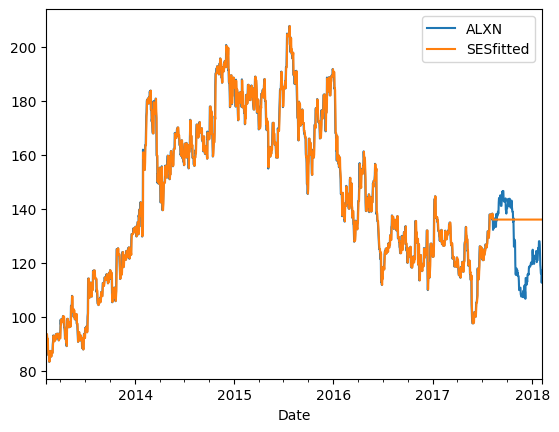

In [20]:
# assign predictions to our original models using this indexes
df.loc[train_idx, 'SESfitted'] = res.fittedvalues
df.loc[test_idx, 'SESfitted'] = res.forecast(N_test)
df[['ALXN', 'SESfitted']].plot()

**Conclusion**:
1) For the training data, SES does a good job smoothing out the stock prices while capturing the general trends.

2) For the test data, SES appears to struggle with predicting sudden changes or volatility, as it tends to provide a smoother and flatter forecast.

3) If the goal is to capture rapid fluctuations or better anticipate market shocks, a more complex model (such as Holt-Winters or ARIMA) might be     needed.

In [21]:
res.params
# it is doing very naive forecast , ie. it copying last most values giving us a forecast

{'smoothing_level': 0.9660825911342779,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 93.66,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Holt's linear trend model :
It extends the SES , so that we can capture and forecast trends

y = mx+b
yt= slope*t +y0


In [22]:
from statsmodels.tsa.holtwinters import Holt

In [23]:
holt = Holt(
    df['ALXN'],
    initialization_method='legacy-heuristic')

In [24]:
result_holt = holt.fit()

In [25]:
df['Holt'] = result_holt.fittedvalues
df

,ALXN,Manual,EWMA,SESfitted,Holt
Date,,,,,
2013-02-08,93.66,93.660000,93.660000,93.660000,93.660000
2013-02-09,93.66,93.660000,93.660000,93.660000,93.660000
2013-02-10,93.66,93.660000,93.660000,93.660000,93.660000
2013-02-11,92.30,93.388000,93.388000,93.660000,93.660000
2013-02-12,90.21,92.752400,92.752400,92.346128,92.346530
...,...,...,...,...,...
2018-02-03,116.15,120.449549,120.449549,136.115727,116.217942
2018-02-04,116.15,119.589639,119.589639,136.115727,116.152325
2018-02-05,112.72,118.215711,118.215711,136.115727,116.150080


<Axes: xlabel='Date'>

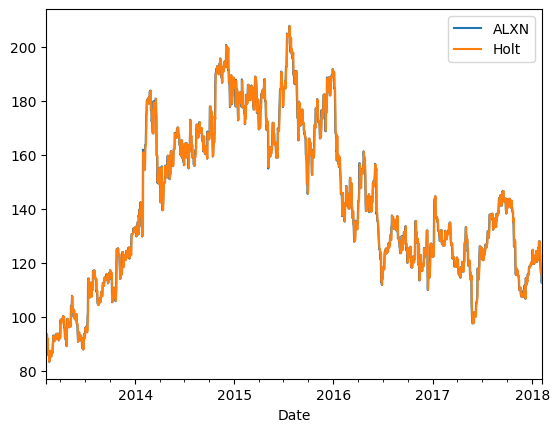

In [26]:
df[['ALXN', 'Holt']].plot()

**Conclusion**: The Holt model works well in this case by capturing the stock’s general trend. However, it may not respond quickly to sudden price shocks or high volatility, as seen in some rapid movements. This is typical for trend-smoothing models, which prioritize long-term trends over short-term fluctuations.

In [27]:
holt = Holt(train['ALXN'], initialization_method='legacy-heuristic')
res_h = holt.fit()

<Axes: xlabel='Date'>

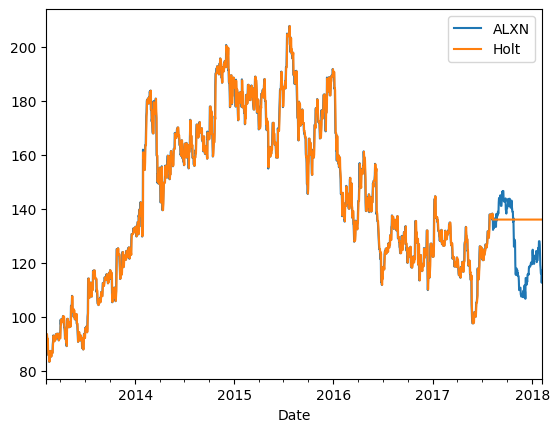

In [28]:
df.loc[train_idx, 'Holt'] = res_h.fittedvalues
df.loc[test_idx, 'Holt'] = res_h.forecast(N_test)
df[['ALXN', 'Holt']].plot()

**Conclusion**: The Holt model performed well during the training period but failed to accurately predict future stock prices, as seen in the test period. This highlights the limitations of using simple exponential smoothing models like Holt for forecasting when data exhibits high volatility or complex patterns.

# Holt-Winters Model

It not only captures trend but also captures seasonality and it is very important to capture seasonality
We have trend , seasonal, level component, so how we combined them together?

Additive = y = level + trend + seasonal

you just  add seasonal component just noisy line to periodic signal , and this periodic signal does not change in time
Ex: Plot of Birthtimeseries

Multiplicative : y = (level+trend)*seasonal

Sesonal component changes proportional to the level of the time series Ex: Plot of Sales at Souvenir Shop


In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

TREND = ADD

SEASONAL = ADD

In [30]:
holts_winter = ExponentialSmoothing(
    train['ALXN'],
    initialization_method='legacy-heuristic',
    trend='add', seasonal='add', seasonal_periods=12)
result_holts_winter = holts_winter.fit()

<Axes: xlabel='Date'>

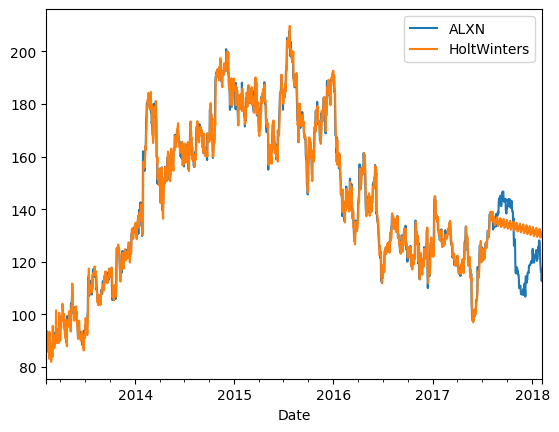

In [31]:

df.loc[train_idx, 'HoltWinters'] = result_holts_winter.fittedvalues
df.loc[test_idx, 'HoltWinters'] = result_holts_winter.forecast(N_test)
df[['ALXN', 'HoltWinters']].plot()

**Conclusion**: The forecast line (orange) continues after the actual values (blue), showing the expected trend and seasonality going forward. We see a downward forecast beyond the observed data range, indicating the model's prediction of declining values..

In [32]:
def rmse(y, t):
  return np.sqrt(np.mean((y - t)**2))
def mae(y, t):
  return np.mean(np.abs(y - t))

In [33]:
print("Train RMSE:", rmse(train['ALXN'], result_holts_winter.fittedvalues))
print("Test RMSE:", rmse(test['ALXN'], result_holts_winter.forecast(N_test)))
print("Train MAE:", mae(train['ALXN'],result_holts_winter.fittedvalues))
print("Test MAE:", mae(test['ALXN'], result_holts_winter.forecast(N_test)))

Train RMSE: 3.1905865605527945
Test RMSE: 12.86685394736307
Train MAE: 2.1894818273984944
Test MAE: 10.982958561140952


Conclusion:
1) The training RMSE (3.19) indicates that, on average, the model's predictions for the training data are fairly close to the actual values, with an average error magnitude of around 3.19.

2) However, the test RMSE (12.87) is much larger, suggesting that when applied to unseen test data, the model's predictions are significantly less accurate, with an average error of 12.87.

3) The training MAE (2.19) indicates that, on average, the model's predictions for the training data are about 2.19 units away from the actual values.

4) The test MAE (10.98) shows that, on average, the model's predictions for the test data are about 10.98 units off from the actual values.

In summary, the model performs well on the training data but poorly on the test data, suggesting that it's overfitting to the training set and not generalizing well to new data.

TREND = ADD

SEASONAL = MULTIPLIY

<Axes: xlabel='Date'>

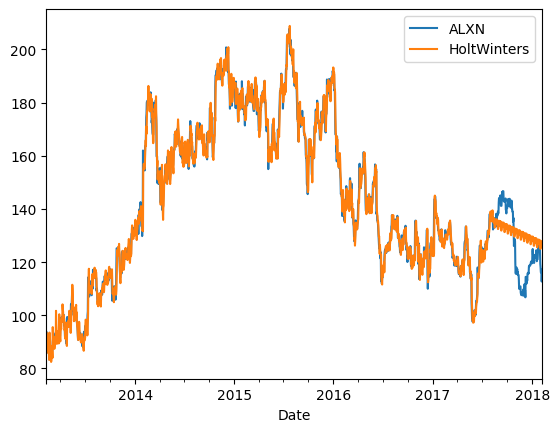

In [34]:
hw = ExponentialSmoothing(
    train['ALXN'],
    initialization_method='legacy-heuristic',
    trend='add', seasonal='mul', seasonal_periods=12)
res_hw = hw.fit()
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)
df[['ALXN', 'HoltWinters']].plot()

**Conclusion**: The forecast line (orange) continues after the actual values (blue), showing the expected trend and seasonality going forward. We see a downward forecast beyond the observed data range, indicating the model's prediction of declining values..

In [35]:
print("Train RMSE:", rmse(train['ALXN'], res_hw.fittedvalues))
print("Test RMSE:", rmse(test['ALXN'], res_hw.forecast(N_test)))
print("Train MAE:", mae(train['ALXN'], res_hw.fittedvalues))
print("Test MAE:", mae(test['ALXN'], res_hw.forecast(N_test)))

Train RMSE: 3.3130034590555004
Test RMSE: 11.46751875978531
Train MAE: 2.3220364499542683
Test MAE: 9.749541325562202


Conclusion:
1) The training RMSE (3.31) indicates that, on average, the model's predictions for the training data are fairly close to the actual values, with an average error magnitude of around 3.31.

2) However, the test RMSE (11.46) is much larger, suggesting that when applied to unseen test data, the model's predictions are significantly less accurate, with an average error of 11.46.

3) The training MAE (2.32) indicates that, on average, the model's predictions for the training data are about 2.32 units away from the actual values.

4) The test MAE (9.4) shows that, on average, the model's predictions for the test data are about 9.4 units off from the actual values.

In summary, the model performs well on the training data but poorly on the test data, suggesting that it's overfitting to the training set and not generalizing well to new data.

TREND = MULTIPLY

SEASONAL = MULTIPLIY

D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Date'>

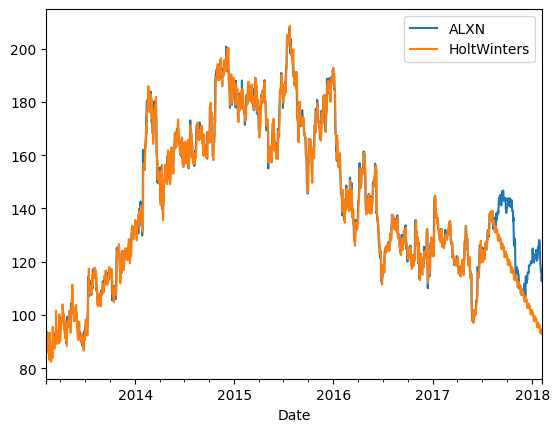

In [36]:
hw = ExponentialSmoothing(
    train['ALXN'],
    initialization_method='legacy-heuristic',
    trend='mul', seasonal='mul', seasonal_periods=12)
res_hw = hw.fit()
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)
df[['ALXN', 'HoltWinters']].plot()

**Conclusion**: The graph shows the actual data for "ALXN" (blue line) and the predicted values from the Holt-Winters model (orange line). The model fits the historical data well up to 2017, capturing the seasonal fluctuations and trends. However, in the forecast period (post-2017), the model predicts a sharp decline, which diverges from the actual trend. This indicates that while the model works well for the training period, it may not be accurately predicting future values beyond 2017.

In [37]:
print("Train RMSE:", rmse(train['ALXN'], res_hw.fittedvalues))
print("Test RMSE:", rmse(test['ALXN'], res_hw.forecast(N_test)))
print("Train MAE:", mae(train['ALXN'], res_hw.fittedvalues))
print("Test MAE:", mae(test['ALXN'], res_hw.forecast(N_test)))

Train RMSE: 3.329625962223291
Test RMSE: 17.10307379713586
Train MAE: 2.3378739376944893
Test MAE: 14.408673497491334


**Conclusion**: 
1) Train RMSE (3.33) and MAE (2.34): The model makes relatively small errors in predicting the training data, indicating a good fit during training.

2) Test RMSE (17.10) and MAE (14.41): The large increase in both RMSE and MAE for the test set shows that the model struggles to generalize to new, unseen data. The errors in the test set are significantly higher, indicating overfitting on the training data.

TREND = MULTIPLY

SEASONAL = ADD

<Axes: xlabel='Date'>

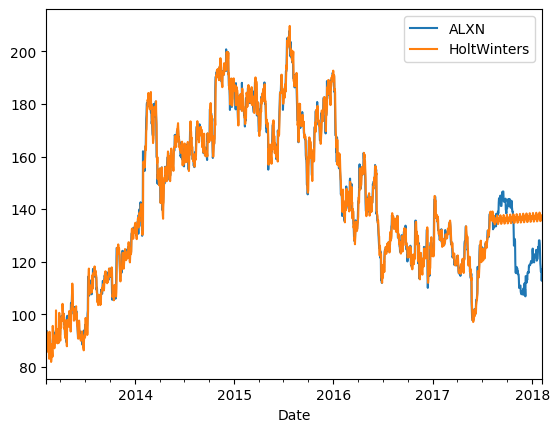

In [40]:
hw = ExponentialSmoothing(
    train['ALXN'],
    initialization_method='legacy-heuristic',
    trend='mul', seasonal='add', seasonal_periods=12)
res_hw = hw.fit()
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)
df[['ALXN', 'HoltWinters']].plot()

**Conclusion**: The model appears to fit the data reasonably well, capturing the trend and seasonality in the data. However, there are some discrepancies between the actual and forecasted values, particularly towards the end of the time series. This suggests that the model might not be perfectly capturing the underlying dynamics of the data.

In [41]:
print("Train RMSE:", rmse(train['ALXN'], res_hw.fittedvalues))
print("Test RMSE:", rmse(test['ALXN'], res_hw.forecast(N_test)))
print("Train MAE:", mae(train['ALXN'], res_hw.fittedvalues))
print("Test MAE:", mae(test['ALXN'], res_hw.forecast(N_test)))

Train RMSE: 3.1938146767899593
Test RMSE: 15.663908919597331
Train MAE: 2.195273786382808
Test MAE: 13.137359719989353


In [42]:
# Assume the forecast horizon we care about is 365
# Validate over 10 steps
h = 12
steps = 10
Ntest = len(df) - h - steps + 1

In [43]:
# Configuration hyperparameters to try
trend_type_list = ['add', 'mul']
seasonal_type_list = ['add', 'mul']
damped_trend_list = [True, False]
init_method_list = ['estimated', 'heuristic', 'legacy-heuristic']
use_boxcox_list = [True, False, 0]

In [51]:
def walkforward(trend_type,seasonal_type,damped_trend,init_method,use_boxcox,debug=False):

  # store errors
  errors = []
  seen_last = False
  steps_completed = 0

  for end_of_train in range(Ntest, len(df) - h + 1):
    # We don't have to manually "add" the data to our dataset
    # Just index it at the right points - this is a "view" not a "copy"
    # So it doesn't take up any extra space or computation
    train = df.iloc[:end_of_train]
    test = df.iloc[end_of_train:end_of_train + h]

    if test.index[-1] == df.index[-1]:
      seen_last = True # Just a debugging to end of data

    steps_completed += 1

    hw = ExponentialSmoothing(
        train['ALXN'],
        initialization_method=init_method,
        trend=trend_type,
        damped_trend=damped_trend,
        seasonal=seasonal_type,
        seasonal_periods=365,
        use_boxcox=use_boxcox)
    res_hw = hw.fit()

    # compute error for the forecast horizon
    fcast = res_hw.forecast(h)
    error = mean_squared_error(test['ALXN'], fcast)
    errors.append(error)

  if debug:
    print("seen_last:", seen_last)
    print("steps completed:", steps_completed)

  return np.mean(errors)

In [47]:
# test our function
walkforward('add', 'add', False, 'legacy-heuristic', 0, debug=True)

seen_last: True
steps completed: 10


44.93838147142198

In [48]:
# Iterate through all possible options (i.e. grid search)
tuple_of_option_lists = (
    trend_type_list,
    seasonal_type_list,
    damped_trend_list,
    init_method_list,
    use_boxcox_list,
)
# Itertools loops through all possible combination
for x in itertools.product(*tuple_of_option_lists):
  print(x)

('add', 'add', True, 'estimated', True)
('add', 'add', True, 'estimated', False)
('add', 'add', True, 'estimated', 0)
('add', 'add', True, 'heuristic', True)
('add', 'add', True, 'heuristic', False)
('add', 'add', True, 'heuristic', 0)
('add', 'add', True, 'legacy-heuristic', True)
('add', 'add', True, 'legacy-heuristic', False)
('add', 'add', True, 'legacy-heuristic', 0)
('add', 'add', False, 'estimated', True)
('add', 'add', False, 'estimated', False)
('add', 'add', False, 'estimated', 0)
('add', 'add', False, 'heuristic', True)
('add', 'add', False, 'heuristic', False)
('add', 'add', False, 'heuristic', 0)
('add', 'add', False, 'legacy-heuristic', True)
('add', 'add', False, 'legacy-heuristic', False)
('add', 'add', False, 'legacy-heuristic', 0)
('add', 'mul', True, 'estimated', True)
('add', 'mul', True, 'estimated', False)
('add', 'mul', True, 'estimated', 0)
('add', 'mul', True, 'heuristic', True)
('add', 'mul', True, 'heuristic', False)
('add', 'mul', True, 'heuristic', 0)
('add

In [49]:
df

,ALXN,Manual,EWMA,SESfitted,Holt,HoltWinters
Date,,,,,,
2013-02-08,93.66,93.660000,93.660000,93.660000,93.660000,93.304146
2013-02-09,93.66,93.660000,93.660000,93.660000,93.660000,93.267130
2013-02-10,93.66,93.660000,93.660000,93.660000,93.660000,93.263998
2013-02-11,92.30,93.388000,93.388000,93.660000,93.660000,91.904466
2013-02-12,90.21,92.752400,92.752400,92.346128,92.346124,89.815314
...,...,...,...,...,...,...
2018-02-03,116.15,120.449549,120.449549,136.115727,136.115720,136.894560
2018-02-04,116.15,119.589639,119.589639,136.115727,136.115720,137.650861
2018-02-05,112.72,118.215711,118.215711,136.115727,136.115720,137.500165


In [50]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd

# Example DataFrame (replace with your data)
# df = pd.read_csv('your_data.csv')
# df['ABBV'] = df['ABBV'].fillna(method='ffill')  # Fill missing values

# Fit the model without initial parameters
model = ExponentialSmoothing(df['ALXN'], seasonal='add', seasonal_periods=365)

try:
    fit= model.fit(optimized=True)  # Try different methods like 'powell' or 'nelder'
except Exception as e:
    print(f"An error occurred: {e}")

# Check the fit summary
print(fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     ALXN   No. Observations:                 1826
Model:             ExponentialSmoothing   SSE                          11797.996
Optimized:                         True   AIC                           4140.954
Trend:                             None   BIC                           6163.081
Seasonal:                      Additive   AICC                          4328.496
Seasonal Periods:                   365   Date:                 Sun, 06 Oct 2024
Box-Cox:                          False   Time:                         19:23:25
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.9619354                alpha                 True
smoothing_seasonal    

D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [52]:
print(fit.mle_retvals)

 message: Iteration limit reached
 success: False
  status: 9
     fun: 11797.996192058992
       x: [ 9.619e-01  3.073e-09 ... -4.521e-01  1.471e+00]
     nit: 100
     jac: [-3.531e+00  4.324e+02 ... -4.980e-02  7.275e-02]
    nfev: 37003
    njev: 100


In [53]:
fcast = res_hw.forecast(h)

In [55]:
if test['ALXN'].isnull().values.any() or pd.isnull(fcast).any():
        print("Warning: NaN values found in input data for MSE calculation.")
        # Handle NaN values (e.g., remove or impute)
        # import itertools

# # Initialize best score and options
# best_score = float('inf')
# best_options = None

# # Iterate through all possible parameter combinations
# for x in itertools.product(*tuple_of_option_lists):
#     score = walkforward(*x)  # Calculate score using walk-forward validation

#     # Check if the current score is better than the best so far
#     if score < best_score:
#         print("Best score so far:", score)
#         best_score = score
#         best_options = x  # Store the best option combination

# # Final output: Best score and corresponding parameters
# print("Best score:", best_score)
# print("Best parameter combination:", best_options)
score_threshold = 0.1  # Define your threshold
best_score = float('inf')
for x in itertools.product(*tuple_of_option_lists):
    score = walkforward(*x)
    if score < best_score:
        print("Best score so far:", score)
        best_score = score
        best_options = x

    # Check if the score is below the threshold
    if best_score < score_threshold:
        print("Score below threshold; stopping early.")
        break

print("Best score:", best_score)
print("Best parameter combination:", best_options)

D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optim

Best score so far: 64.96561788310296


D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optim

Best score so far: 34.64819787525211


D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optim

Best score: 34.64819787525211
Best parameter combination: ('add', 'add', True, 'estimated', 0)


In [56]:
print("best score:", best_score)

trend_type, seasonal_type, damped_trend, init_method, use_boxcox = best_options
print("trend_type", trend_type)
print("seasonal_type", seasonal_type)
print("damped_trend", damped_trend)
print("init_method", init_method)
print("use_boxcox", use_boxcox)

best score: 34.64819787525211
trend_type add
seasonal_type add
damped_trend True
init_method estimated
use_boxcox 0


**Conclusion**: In summary, this model is an additive ETS(Error,Trend,Seasonality) model with a damped trend and no Box-Cox transformation, which provided a relatively good fit to the data with a score of 34.65.

In [63]:
hw = ExponentialSmoothing(
    train['ALXN'],
    initialization_method='estimated',
    trend='add',
    damped_trend=True,
    seasonal='add',
    seasonal_periods=12,
    use_boxcox=False)
res_hw = hw.fit()

In [64]:
df.loc[train_idx, 'TrainPred'] = res_hw.fittedvalues
df.loc[test_idx, 'Forecast'] = res_hw.forecast(Ntest)

<Axes: xlabel='Date'>

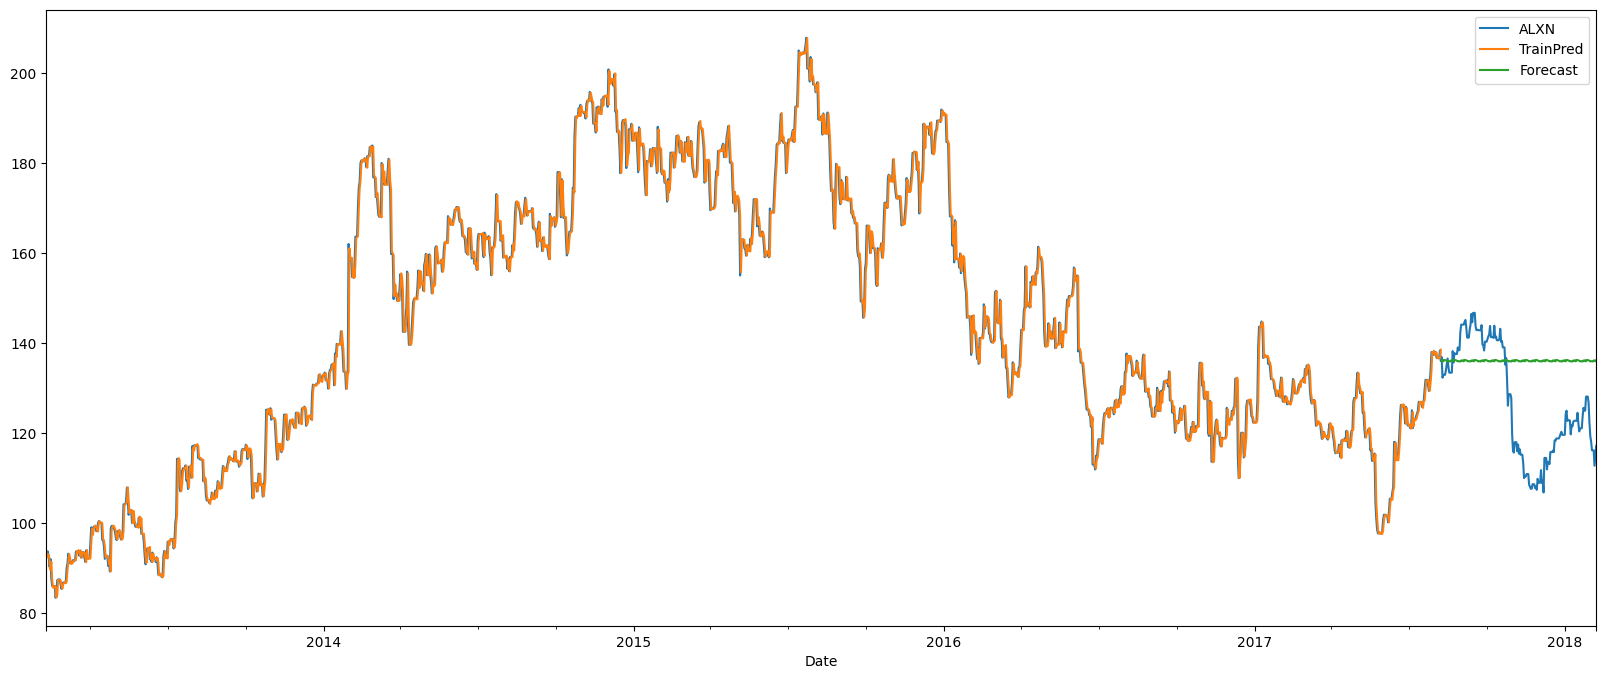

In [65]:
df[['ALXN', 'TrainPred', 'Forecast']].plot(figsize=(20, 8))

**Conclusion**:
1) The orange line (TrainPred) closely follows the blue line (ALXN), indicating that the model fits the historical data quite well, showing strong alignment between the actual and predicted values in the training period.

2) The green line represents the forecast for future stock prices.It shows a projected decline after the training period, followed by some stabilization, though with a significant dip around mid-2017.

3) The clear ups and downs suggest that the model has captured the seasonal or cyclical nature of the stock's price movements well.

This graph demonstrates that the model effectively learns from past data and makes a reasonable forecast with an anticipated downward trend and subsequent stabilization.
